### Install Dependency

In [ ]:
!pip install spotipy

### Connecting to Spotify Web API

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util

In [2]:
client_id = #write yours
client_secret= #write yours

In [3]:
scope = 'user-library-read'

In [4]:
token = util.prompt_for_user_token(scope, client_id= client_id, client_secret=client_secret, redirect_uri='http://localhost:8881/callback')

In [5]:
sp = spotipy.Spotify(auth=token)

In [6]:
playlist_dic = {}
playlist_cover_art = {}
for i in sp.current_user_playlists()['items']:

    playlist_dic[i['name']] = i['uri'].split(':')[2]
    playlist_cover_art[i['uri'].split(':')[2]] = i['images'][0]['url']

In [7]:
playlist_dic

{'MixedMood': '3frK7FltbRlCVbXEMsvTa5',
 'Bolly': '2qfzhcYNtimhOACNk8Dzmb',
 'Fav': '4UvAf6YSu7QEQyGdHU8pfn'}

In [8]:
def generate_playlist_df(playlist_name, playlist_dic, spotify_data):
    
    playlist = pd.DataFrame()

    for i, j in enumerate(sp.playlist(playlist_dic[playlist_name])['tracks']['items']):
        playlist.loc[i, 'artist'] = j['track']['artists'][0]['name']
        playlist.loc[i, 'track_name'] = j['track']['name']
        playlist.loc[i, 'track_id'] = j['track']['id']
        playlist.loc[i, 'url'] = j['track']['album']['images'][1]['url']
        playlist.loc[i, 'date_added'] = j['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['track_id'].isin(spotify_data['track_id'].values)].sort_values('date_added',ascending = False)

    return playlist

### Song's Features Data

In [9]:
import pandas as pd
spotify_data = pd.read_csv('SpotifyFeatures.csv')

In [10]:
spotify_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [11]:
playlist_df = generate_playlist_df('MixedMood', playlist_dic, spotify_data)

In [13]:
playlist_df.head()

,artist,track_name,track_id,url,date_added
38,The Beatles,While My Guitar Gently Weeps - Remastered 2009,389QX9Q1eUOEZ19vtzzI9O,https://i.scdn.co/image/ab67616d00001e024ce8b4...,2021-09-12 09:04:08+00:00
37,Bob Dylan,Blowin' in the Wind,18GiV1BaXzPVYpp9rmOg0E,https://i.scdn.co/image/ab67616d00001e027d214a...,2021-09-12 08:04:39+00:00
36,Bob Dylan,Knockin' On Heaven's Door,6HSXNV0b4M4cLJ7ljgVVeh,https://i.scdn.co/image/ab67616d00001e026c8668...,2021-09-08 15:08:07+00:00
35,Europe,Carrie,29wJiSQcze8HEmxkUQykyp,https://i.scdn.co/image/ab67616d00001e022d925c...,2021-09-07 19:11:01+00:00
34,Scorpions,Send Me An Angel,1bKQ48M9onID2kbSpRy8kK,https://i.scdn.co/image/ab67616d00001e02787674...,2021-09-07 19:10:56+00:00


### Creating playlist DataFrame

In [14]:
from skimage import io
import matplotlib.pyplot as plt

def visualize_cover_art(playlist_df):
    temp = playlist_df['url'].values
    plt.figure(figsize=(15,int(0.625 * len(temp))) , facecolor='#8cfc03')
    columns = 5
    
    for i, url in enumerate(temp):
        plt.subplot(len(temp) / columns + 1, columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        s='' 
        plt.xlabel(s.join(playlist_df['track_name'].values[i].split(' ')[:4]), fontsize = 10, fontweight='bold')
        plt.tight_layout(h_pad=0.8, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()

<ipython-input-72-dcd6309dc7e4>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(temp) / columns + 1, columns, i + 1)


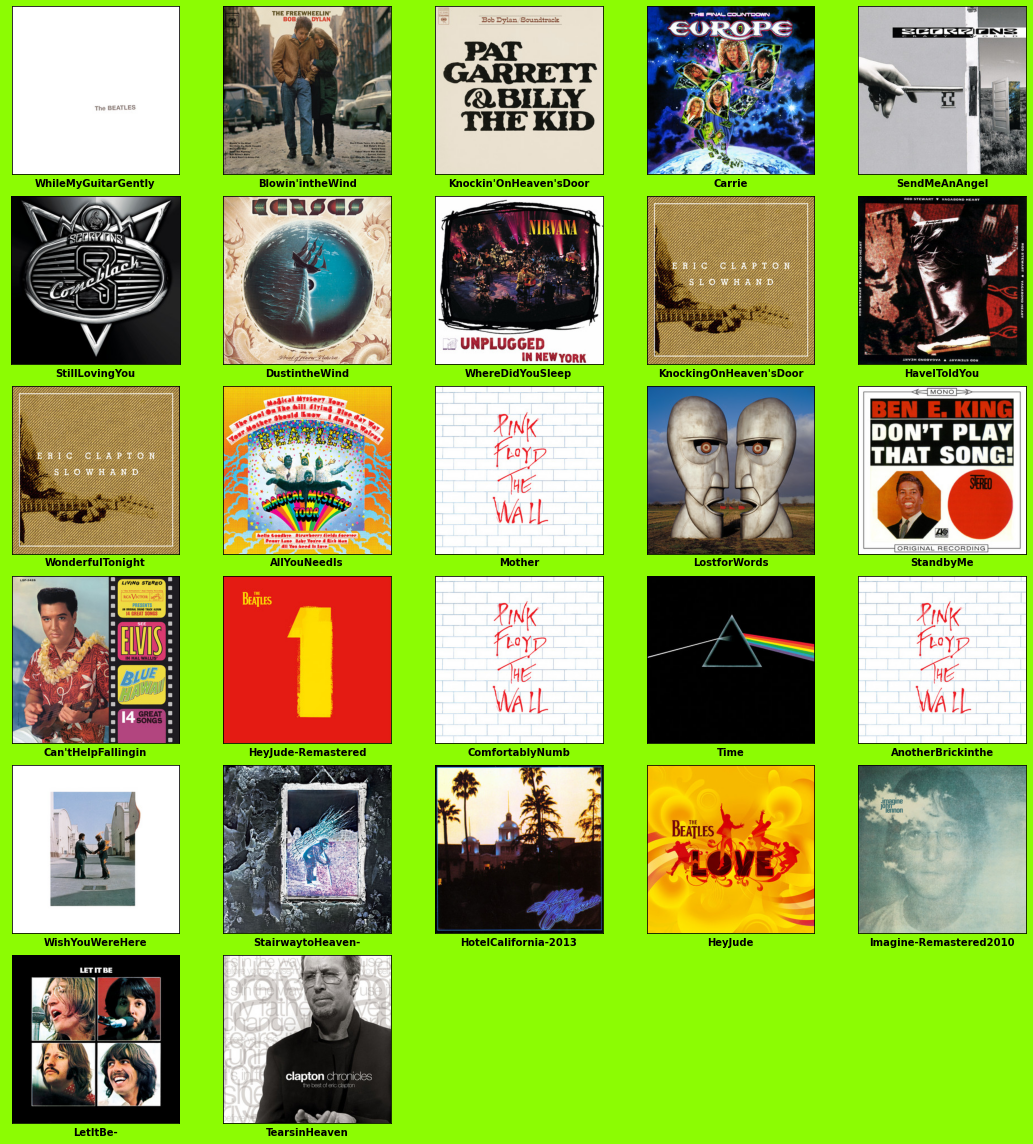

In [73]:
visualize_cover_art(playlist_df)

In [36]:
playlist_df.to_csv('playlist.csv')

### Feature Engineering

In [15]:
spotify_features_df = spotify_data

In [16]:
genre_OHE = pd.get_dummies(spotify_features_df.genre)
genre_OHE.head()

,A Capella,Alternative,Anime,Blues,Children's Music,Children’s Music,Classical,Comedy,Country,Dance,...,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
key_OHE = pd.get_dummies(spotify_features_df.key)
key_OHE.head()

,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaled_features = MinMaxScaler().fit_transform([spotify_features_df['acousticness'].values,spotify_features_df['danceability'].values,spotify_features_df['duration_ms'].values,spotify_features_df['energy'].values,spotify_features_df['instrumentalness'].values,spotify_features_df['liveness'].values,spotify_features_df['loudness'].values,spotify_features_df['speechiness'].values,spotify_features_df['tempo'].values,spotify_features_df['valence'].values])

In [20]:
spotify_features_df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']] = scaled_features.T

In [21]:
spotify_features_df = spotify_features_df.drop('genre',axis = 1)
spotify_features_df = spotify_features_df.drop('artist_name', axis = 1)
spotify_features_df = spotify_features_df.drop('track_name', axis = 1)
spotify_features_df = spotify_features_df.drop('popularity',axis = 1)
spotify_features_df = spotify_features_df.drop('key', axis = 1)
spotify_features_df = spotify_features_df.drop('mode', axis = 1)
spotify_features_df = spotify_features_df.drop('time_signature', axis = 1)

In [22]:
spotify_features_df = spotify_features_df.join(genre_OHE)
spotify_features_df = spotify_features_df.join(key_OHE)

In [23]:
spotify_features_df.shape

(232725, 50)

In [24]:
spotify_features_df.head()

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,B,C,C#,D,D#,E,F,F#,G,G#
0,0BRjO6ga9RKCKjfDqeFgWV,0.000025,0.000022,1.0,0.000028,0.000018,0.000022,0.0,0.000019,0.001699,...,0,0,1,0,0,0,0,0,0,0
1,0BjC1NfoEOOusryehmNudP,0.000042,0.000045,1.0,0.000046,0.000040,0.000042,0.0,0.000041,0.001307,...,0,0,0,0,0,0,0,1,0,0
2,0CoSDzoNIKCRs124s9uTVy,0.000087,0.000085,1.0,0.000082,0.000082,0.000082,0.0,0.000082,0.000666,...,0,1,0,0,0,0,0,0,0,0
3,0Gc6TVm52BwZD07Ki6tIvf,0.000084,0.000081,1.0,0.000082,0.000080,0.000081,0.0,0.000080,0.001207,...,0,0,1,0,0,0,0,0,0,0
4,0IuslXpMROHdEPvSl1fTQK,0.000267,0.000260,1.0,0.000259,0.000257,0.000258,0.0,0.000256,0.001957,...,0,0,0,0,0,0,1,0,0,0


### Generating Playlist Vector

In [25]:
from datetime import datetime

In [26]:
def generate_playlist_vector(spotify_features, playlist_df, weight_factor):
    
    spotify_features_playlist = spotify_features[spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    spotify_features_playlist = spotify_features_playlist.merge(playlist_df[['track_id','date_added']], on = 'track_id', how = 'inner')
    
    spotify_features_nonplaylist = spotify_features[~spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    
    playlist_feature_set = spotify_features_playlist.sort_values('date_added',ascending=False)
    
    
    most_recent_date = playlist_feature_set.iloc[0,-1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'days_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days)
        
    
    playlist_feature_set['weight'] = playlist_feature_set['days_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-3].mul(playlist_feature_set_weighted.weight.astype(int),0))   
    
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-3]
    

    
    return playlist_feature_set_weighted_final.sum(axis = 0), spotify_features_nonplaylist


In [27]:
playlist_vector, nonplaylist_df = generate_playlist_vector(spotify_features_df, playlist_df, 1.2)

In [30]:
print(playlist_vector.shape)
print(nonplaylist_df.shape)

(50,)
(232687, 50)


In [29]:
nonplaylist_df.shape

(232687, 50)

### Generate Recommendations

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
def generate_recommendation(spotify_data, playlist_vector, nonplaylist_df):

    non_playlist = spotify_data[spotify_data['track_id'].isin(nonplaylist_df['track_id'].values)]
    non_playlist['sim'] = cosine_similarity(nonplaylist_df.drop(['track_id'], axis = 1).values, playlist_vector.drop(labels = 'track_id').values.reshape(1, -1))[:,0]
    non_playlist_top15 = non_playlist.sort_values('sim',ascending = False).head(15)
    non_playlist_top15['url'] = non_playlist_top15['track_id'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])
    
    return  non_playlist_top15

In [38]:
top15 = generate_recommendation(spotify_data, playlist_vector, nonplaylist_df)  

<ipython-input-37-d9d2733e0d7e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_playlist['sim'] = cosine_similarity(nonplaylist_df.drop(['track_id'], axis = 1).values, playlist_vector.drop(labels = 'track_id').values.reshape(1, -1))[:,0]


In [42]:
top15.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,sim,url
155235,Rock,Jefferson Airplane,Embryonic Journey,2zbGXr2XCcRR40R7ymEENc,54,0.000132,0.000128,1.0,0.000128,0.000133,D,0.000126,0.0,Major,0.000125,0.001085,4/4,0.000129,0.927173,https://i.scdn.co/image/ab67616d00001e022dac7a...
154175,Rock,Simon & Garfunkel,A Hazy Shade of Winter,2GB8OypbvrvCee61FKx5dp,58,0.000082,0.000085,1.0,0.000086,0.000081,D,0.000084,0.0,Minor,0.000082,0.001114,4/4,0.000089,0.927173,https://i.scdn.co/image/ab67616d00001e02d8fb5b...
154365,Rock,The Beatles,Don't Bother Me - Remastered 2009,7y1hMqXNa0dKQLZH7CKbUG,57,0.000070,0.000069,1.0,0.000071,0.000066,D,0.000068,0.0,Major,0.000066,0.001215,4/4,0.000072,0.927173,https://i.scdn.co/image/ab67616d00001e02608a63...
226335,Rock,AJR,Call My Dad,5qKTSItBFkJ2gLJqStRt1O,51,0.000085,0.000083,1.0,0.000081,0.000079,D,0.000080,0.0,Major,0.000081,0.001082,3/4,0.000082,0.927173,https://i.scdn.co/image/ab67616d00001e02e7c12f...
224464,Rock,alt-J,Dancing in the Moonlight (It's Caught Me in It...,2fpfApt0LZiOWybYfRVXTB,56,0.000126,0.000123,1.0,0.000121,0.000120,D,0.000121,0.0,Major,0.000120,0.001024,4/4,0.000122,0.927173,https://i.scdn.co/image/ab67616d00001e02b85cf9...


### Top 15 recommended songs

<ipython-input-14-dcd6309dc7e4>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(temp) / columns + 1, columns, i + 1)


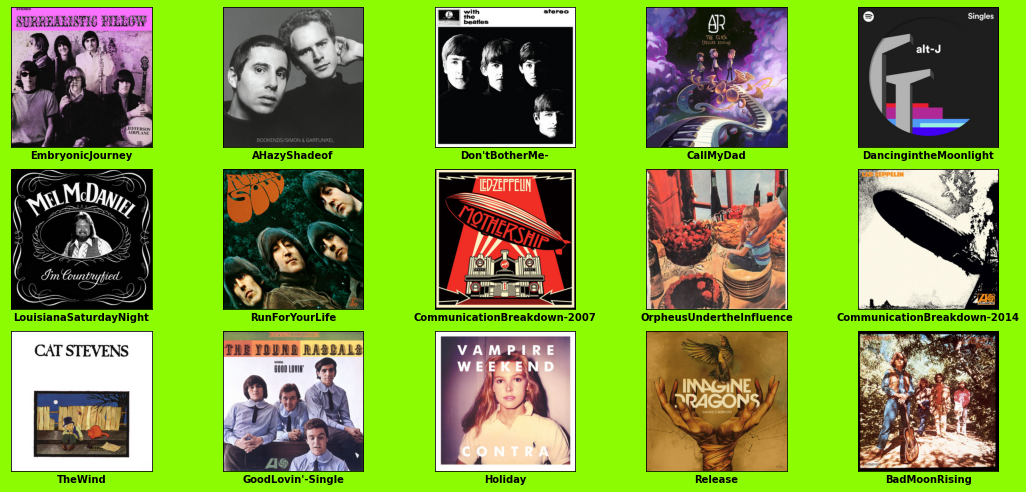

In [43]:
visualize_cover_art(top15)